In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
dataset=pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,[3,4]].values

In [16]:
# use elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   # Within Cluster Sum of Square is computed using inertia_ 

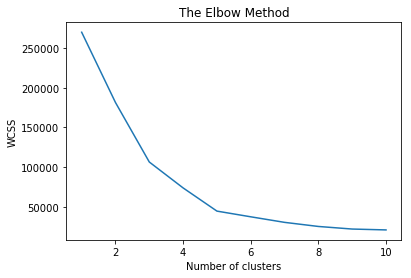

In [17]:
# Vidualise WCSS 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# The optimal number of cluster seems to be five from the graph
kmeans = KMeans(5, random_state=0)
y_kmeans= kmeans.fit_predict(X)   # y_kmeans indicates the cluster for which one belongs

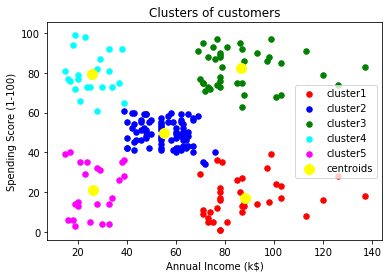

In [25]:
# Visualising the clusters
plt.scatter(x=X[y_kmeans==0, 0], y=X[y_kmeans==0,1], s=30,c='red', label='cluster1')  # choose the first columns of X where y_kmeans=0
plt.scatter(x=X[y_kmeans==1, 0], y=X[y_kmeans==1,1], s=30,c='blue', label='cluster2') # `s` to specify the size of each point
plt.scatter(x=X[y_kmeans==2, 0], y=X[y_kmeans==2,1], s=30,c='green', label='cluster3')
plt.scatter(x=X[y_kmeans==3, 0], y=X[y_kmeans==3,1], s=30,c='cyan', label='cluster4')
plt.scatter(x=X[y_kmeans==4, 0], y=X[y_kmeans==4,1], s=30,c='magenta', label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='yellow', label='centroids')    #```kmeans.cluster_centers_``` contains the info of x-cordinate and y cordinate for each clusters

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
